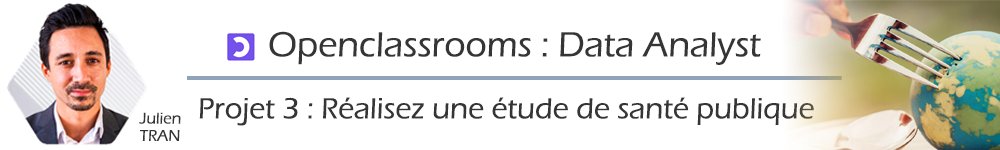

### Question 11 : En ne prenant en compte que les c√©r√©ales destin√©es √† l'alimentation (humaine et animale), quelle proportion (en termes de poids) est destin√©e √† l'alimentation animale ?

S√©lectionnez parmi les donn√©es des bilans alimentaires les informations relatives aux pays dans lesquels la FAO recense des personnes en sous-nutrition.

Rep√©rez les 15 produits les plus export√©s par ce groupe de pays.

### Sommaire // Question 11 üçå

* [1.Importation des librairies et parametres df](#1)
* [2.Importation des fichiers CSV](#2)
* [3.Nettoyage des diff√©rentes tables](#3)
    * [3.1.Population](#3.1)
        * [3.1.1.Valeurs manquantes, nulles et NA](#3.1.1)
        * [3.1.2.Doublons](#3.1.2)
    * [3.2.Vegetaux](#3.2)
        * [3.2.1.Valeurs manquantes, nulles et NA](#3.2.1)
        * [3.2.2.Doublons](#3.2.2)
    * [3.3.Animaux](#3.3)
        * [3.3.1.Valeurs manquantes, nulles et NA](#3.3.1)
        * [3.3.2.Doublons](#3.3.2)
    * [3.4.c√©r√©ales](#3.4)
        * [3.4.1.Valeurs manquantes, nulles et NA](#3.4.1)
        * [3.4.2.Doublons](#3.4.2)
    * [3.5.sous_alimentation](#3.5)
        * [3.5.1.Valeurs manquantes, nulles et NA](#3.5.1)
        * [3.5.2.Doublons](#3.5.2)
* [4.Liste des produits consid√©r√©s comme c√©r√©ales](#4)
* [5.Proportion des c√©r√©ales destin√©s √† l'alimentation des animaux (poids)](#5)
* [6.15 produits les plus export√©s dans les pays sous aliment√©s](#6)

## 1.Importation des librairies et parametres df <a class="anchor" id="1"></a>

In [1]:
#j'importe les librairies qui vont me servir plus tard
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 2.Importation des fichiers CSV <a class="anchor" id="2"></a>

In [2]:
#Je charge tous les fichiers csv
population = pd.read_csv("C:/Users/33643/Desktop/P3/FAO_2013_fr/fr_population.csv")
animaux = pd.read_csv("C:/Users/33643/Desktop/P3/FAO_2013_fr/fr_animaux.csv")
c√©r√©ales = pd.read_csv("C:/Users/33643/Desktop/P3/FAO_2013_fr/fr_c√©r√©ales.csv")
sousalimentation = pd.read_csv("C:/Users/33643/Desktop/P3/FAO_2013_fr/fr_sousalimentation.csv")
vegetaux = pd.read_csv("C:/Users/33643/Desktop/P3/FAO_2013_fr/fr_vegetaux.csv")

#J'affiche une phrase si l'import est reussi
print("Fichiers charg√©s avec succes!") 

Fichiers charg√©s avec succes!


## 3.Nettoyage des diff√©rentes tables <a class="anchor" id="3"></a>

## 3.1.Population <a class="anchor" id="3.1"></a>

In [3]:
#Je jette un coup d'oeil aux 5 premieres lignes du fichier
population.head() 

Code Domaine                                            Domaine  Code zone  \
0         FBSH  Bilans Alimentaire (Ancienne m√©thodologie et p...          2   
1         FBSH  Bilans Alimentaire (Ancienne m√©thodologie et p...        202   
2         FBSH  Bilans Alimentaire (Ancienne m√©thodologie et p...          3   
3         FBSH  Bilans Alimentaire (Ancienne m√©thodologie et p...          4   
4         FBSH  Bilans Alimentaire (Ancienne m√©thodologie et p...         79   

             Zone  Code √âl√©ment            √âl√©ment  Code Produit     Produit  \
0     Afghanistan           511  Population totale          2501  Population   
1  Afrique du Sud           511  Population totale          2501  Population   
2         Albanie           511  Population totale          2501  Population   
3         Alg√©rie           511  Population totale          2501  Population   
4       Allemagne           511  Population totale          2501  Population   

   Code ann√©e  Ann√©e           Unit√©  Valeur Symbole Description du Symbole  
0        2013   2013  1000 personnes   30552     NaN      Donn√©e officielle  
1        2013   2013  1000 personnes   52776     NaN      Donn√©e officielle  
2        2013   2013  1000 personnes    3173     NaN      Donn√©e officielle  
3        2013   2013  1000 personnes   39208     NaN      Donn√©e officielle  
4        2013   2013  1000 personnes   82727     NaN      Donn√©e officielle

In [4]:
#Je jette un coup d'oeil aux total, moyenne, √©crat min, min, max pour toutes les lignes
population.describe()  

Code zone  Code √âl√©ment  Code Produit  Code ann√©e   Ann√©e  \
count  175.000000         175.0         175.0       175.0   175.0   
mean   126.720000         511.0        2501.0      2013.0  2013.0   
std     75.168519           0.0           0.0         0.0     0.0   
min      1.000000         511.0        2501.0      2013.0  2013.0   
25%     64.500000         511.0        2501.0      2013.0  2013.0   
50%    121.000000         511.0        2501.0      2013.0  2013.0   
75%    188.500000         511.0        2501.0      2013.0  2013.0   
max    351.000000         511.0        2501.0      2013.0  2013.0   

             Valeur  
count  1.750000e+02  
mean   4.807996e+04  
std    1.786327e+05  
min    5.400000e+01  
25%    2.543500e+03  
50%    9.413000e+03  
75%    2.888150e+04  
max    1.416667e+06

In [5]:
#Je v√©rifie le nombre de colonnes et lignes
population.shape 

(175, 14)

In [6]:
#Je v√©rifie le nombre de valeur unique dans la colonne Valeur
len(population['Valeur'].unique()) 

175

In [7]:
#Je definis le nombre de lignes max affich√©es sur aucune limite
pd.set_option("max_rows", None) 

## 3.1.1.Valeurs manquantes, nulles et NA <a class="anchor" id="3.1.1"></a>

In [8]:
#Je trie la table par ordre croissant de la colonne Valeur et je drop les colonnes NaN

pop_sorted = population.sort_values(by = 'Valeur').dropna(axis=1)
pop_sorted.head()

Code Domaine                                            Domaine  \
143         FBSH  Bilans Alimentaire (Ancienne m√©thodologie et p...   
20          FBSH  Bilans Alimentaire (Ancienne m√©thodologie et p...   
47          FBSH  Bilans Alimentaire (Ancienne m√©thodologie et p...   
6           FBSH  Bilans Alimentaire (Ancienne m√©thodologie et p...   
89          FBSH  Bilans Alimentaire (Ancienne m√©thodologie et p...   

     Code zone                  Zone  Code √âl√©ment            √âl√©ment  \
143        188  Saint-Kitts-et-Nevis           511  Population totale   
20          17              Bermudes           511  Population totale   
47          55             Dominique           511  Population totale   
6            8    Antigua-et-Barbuda           511  Population totale   
89          83              Kiribati           511  Population totale   

     Code Produit     Produit  Code ann√©e  Ann√©e           Unit√©  Valeur  \
143          2501  Population        2013   2013  1000 personnes      54   
20           2501  Population        2013   2013  1000 personnes      65   
47           2501  Population        2013   2013  1000 personnes      72   
6            2501  Population        2013   2013  1000 personnes      90   
89           2501  Population        2013   2013  1000 personnes     102   

    Description du Symbole  
143      Donn√©e officielle  
20       Donn√©e officielle  
47       Donn√©e officielle  
6        Donn√©e officielle  
89       Donn√©e officielle

#### J'ai remarqu√© en fin de table que la population totale de la chine etait compt√© deux fois.

In [9]:
print(population.isnull().values.any())
print(population.isnull().sum())

True
Code Domaine                0
Domaine                     0
Code zone                   0
Zone                        0
Code √âl√©ment                0
√âl√©ment                     0
Code Produit                0
Produit                     0
Code ann√©e                  0
Ann√©e                       0
Unit√©                       0
Valeur                      0
Symbole                   174
Description du Symbole      0
dtype: int64


## 3.1.2.Doublons <a class="anchor" id="3.1.2"></a>

In [10]:
print(population.duplicated().values.any())

False


In [11]:
#Je supprime la ligne doublon que j'ai rep√©r√© dans la table
population_sschine = population[population.Zone != 'Chine']

#J'en profite pour completer le nettoyage de la table, pour plus tard
population = population_sschine.drop(columns =['Code Domaine','Domaine','Code zone','Code √âl√©ment','Code Produit','Ann√©e','Code ann√©e','Unit√©','Symbole','Description du Symbole'])
population = population.rename(columns ={'Valeur':'Nbr habitants'})
population['Nbr habitants'] = population['Nbr habitants']*1000

population.head(5)

Zone            √âl√©ment     Produit  Nbr habitants
0     Afghanistan  Population totale  Population       30552000
1  Afrique du Sud  Population totale  Population       52776000
2         Albanie  Population totale  Population        3173000
3         Alg√©rie  Population totale  Population       39208000
4       Allemagne  Population totale  Population       82727000

## 3.2.Vegetaux <a class="anchor" id="3.2"></a>

In [12]:
#Je jette un coup d'oeil aux 5 premieres lignes du fichier
vegetaux.head() 

Code Domaine                                            Domaine  Code zone  \
0         FBSH  Bilans Alimentaire (Ancienne m√©thodologie et p...          2   
1         FBSH  Bilans Alimentaire (Ancienne m√©thodologie et p...          2   
2         FBSH  Bilans Alimentaire (Ancienne m√©thodologie et p...          2   
3         FBSH  Bilans Alimentaire (Ancienne m√©thodologie et p...          2   
4         FBSH  Bilans Alimentaire (Ancienne m√©thodologie et p...          2   

          Zone  Code √âl√©ment                   √âl√©ment  Code Produit Produit  \
0  Afghanistan          5511                Production          2511     Bl√©   
1  Afghanistan          5611   Importations - Quantit√©          2511     Bl√©   
2  Afghanistan          5072        Variation de stock          2511     Bl√©   
3  Afghanistan          5301  Disponibilit√© int√©rieure          2511     Bl√©   
4  Afghanistan          5527                  Semences          2511     Bl√©   

   Code ann√©e  Ann√©e               Unit√©  Valeur Symbole  \
0        2013   2013  Milliers de tonnes  5169.0       S   
1        2013   2013  Milliers de tonnes  1173.0       S   
2        2013   2013  Milliers de tonnes  -350.0       S   
3        2013   2013  Milliers de tonnes  5992.0       S   
4        2013   2013  Milliers de tonnes   322.0       S   

  Description du Symbole  
0  Donn√©es standardis√©es  
1  Donn√©es standardis√©es  
2  Donn√©es standardis√©es  
3  Donn√©es standardis√©es  
4  Donn√©es standardis√©es

In [13]:
#Je calcule le nombre d'√©l√©ments uniques dans la colonne Element de la table animaux
len((vegetaux)['√âl√©ment'].unique()) 

15

In [14]:
#Je liste le nombre d'√©l√©ments uniques dans la colonne Element de la table vegetaux
(vegetaux)['√âl√©ment'].unique() 

array(['Production', 'Importations - Quantit√©', 'Variation de stock',
       'Disponibilit√© int√©rieure', 'Semences', 'Pertes', 'Nourriture',
       'Disponibilit√© alimentaire en quantit√© (kg/personne/an)',
       'Disponibilit√© alimentaire (Kcal/personne/jour)',
       'Disponibilit√© de prot√©ines en quantit√© (g/personne/jour)',
       'Disponibilit√© de mati√®re grasse en quantit√© (g/personne/jour)',
       'Aliments pour animaux', 'Exportations - Quantit√©', 'Traitement',
       'Autres utilisations (non alimentaire)'], dtype=object)

In [15]:
#Je v√©rifie le nombre de colonnes et lignes
vegetaux.shape

(104871, 14)

In [16]:
#Je supprime la ligne doublon que j'ai rep√©r√© dans la table
vegetaux_sschine = vegetaux[vegetaux.Zone != 'Chine']
vegetaux = vegetaux_sschine

## 3.2.1.Valeurs manquantes, nulles et NA <a class="anchor" id="3.2.1"></a>

In [17]:
print(vegetaux.isnull().values.any())

False


## 3.2.2.Doublons <a class="anchor" id="3.2.2"></a>

In [18]:
print(vegetaux.duplicated().values.any())

False


## 3.3.Animaux <a class="anchor" id="3.3"></a>

In [19]:
animaux.head()

Code Domaine                                            Domaine  Code zone  \
0         FBSH  Bilans Alimentaire (Ancienne m√©thodologie et p...          2   
1         FBSH  Bilans Alimentaire (Ancienne m√©thodologie et p...          2   
2         FBSH  Bilans Alimentaire (Ancienne m√©thodologie et p...          2   
3         FBSH  Bilans Alimentaire (Ancienne m√©thodologie et p...          2   
4         FBSH  Bilans Alimentaire (Ancienne m√©thodologie et p...          2   

          Zone  Code √âl√©ment  \
0  Afghanistan          5511   
1  Afghanistan          5611   
2  Afghanistan          5301   
3  Afghanistan          5142   
4  Afghanistan           645   

                                             √âl√©ment  Code Produit  \
0                                         Production          2731   
1                            Importations - Quantit√©          2731   
2                           Disponibilit√© int√©rieure          2731   
3                                         Nourriture          2731   
4  Disponibilit√© alimentaire en quantit√© (kg/pers...          2731   

            Produit  Code ann√©e  Ann√©e               Unit√©  Valeur Symbole  \
0  Viande de Bovins        2013   2013  Milliers de tonnes  134.00       S   
1  Viande de Bovins        2013   2013  Milliers de tonnes    6.00       S   
2  Viande de Bovins        2013   2013  Milliers de tonnes  140.00       S   
3  Viande de Bovins        2013   2013  Milliers de tonnes  140.00       S   
4  Viande de Bovins        2013   2013                  kg    4.59      Fc   

  Description du Symbole  
0  Donn√©es standardis√©es  
1  Donn√©es standardis√©es  
2  Donn√©es standardis√©es  
3  Donn√©es standardis√©es  
4        Donn√©e calcul√©e

In [20]:
#Je v√©rifie le nombre de colonnes et lignes
animaux.shape

(37166, 14)

In [21]:
#Je supprime la ligne doublon que j'ai rep√©r√© dans la table
animaux_sschine = animaux[animaux.Zone != 'Chine']
animaux = animaux_sschine

## 3.3.1.Valeurs manquantes, nulles et NA <a class="anchor" id="3.3.1"></a>

In [22]:
print(animaux.isnull().values.any())

False


## 3.3.2.Doublons <a class="anchor" id="3.3.2"></a>

In [23]:
print(animaux.duplicated().values.any())

False


In [24]:
animaux.Valeur[animaux.Valeur < 0] = 0
animaux = animaux.replace(0, np.nan)

vegetaux.Valeur[vegetaux.Valeur < 0] = 0
vegetaux = vegetaux.replace(0, np.nan)

## 3.4.C√©r√©ales <a class="anchor" id="3.4"></a>

In [25]:
c√©r√©ales.head()

Code Domaine                                            Domaine  Code zone  \
0         FBSH  Bilans Alimentaire (Ancienne m√©thodologie et p...          2   
1         FBSH  Bilans Alimentaire (Ancienne m√©thodologie et p...          2   
2         FBSH  Bilans Alimentaire (Ancienne m√©thodologie et p...          2   
3         FBSH  Bilans Alimentaire (Ancienne m√©thodologie et p...          2   
4         FBSH  Bilans Alimentaire (Ancienne m√©thodologie et p...          2   

          Zone  Code √âl√©ment     √âl√©ment  Code Produit           Produit  \
0  Afghanistan          5511  Production          2511               Bl√©   
1  Afghanistan          5511  Production          2805  Riz (Eq Blanchi)   
2  Afghanistan          5511  Production          2513              Orge   
3  Afghanistan          5511  Production          2514              Ma√Øs   
4  Afghanistan          5511  Production          2517            Millet   

   Code ann√©e  Ann√©e               Unit√©  Valeur Symbole  \
0        2013   2013  Milliers de tonnes    5169       S   
1        2013   2013  Milliers de tonnes     342       S   
2        2013   2013  Milliers de tonnes     514       S   
3        2013   2013  Milliers de tonnes     312       S   
4        2013   2013  Milliers de tonnes      13       S   

  Description du Symbole  
0  Donn√©es standardis√©es  
1  Donn√©es standardis√©es  
2  Donn√©es standardis√©es  
3  Donn√©es standardis√©es  
4  Donn√©es standardis√©es

In [26]:
#Je v√©rifie le nombre de colonnes et lignes
c√©r√©ales.shape

(891, 14)

In [27]:
#Je supprime la ligne doublon que j'ai rep√©r√© dans la table
c√©r√©ales_sschine = c√©r√©ales[c√©r√©ales.Zone != 'Chine']
c√©r√©ales = c√©r√©ales_sschine

## 3.4.1.Valeurs manquantes, nulles et NA <a class="anchor" id="3.4.1"></a>

In [28]:
print(c√©r√©ales.isnull().values.any())

False


## 3.4.2.Doublons <a class="anchor" id="3.4.2"></a>

In [29]:
print(c√©r√©ales.duplicated().values.any())

False


## 3.5.Sous alimentation <a class="anchor" id="3.5"></a>

In [30]:
sousalimentation.head()

Code Domaine                             Domaine  Code zone         Zone  \
0           FS  Donn√©es de la s√©curit√© alimentaire          2  Afghanistan   
1           FS  Donn√©es de la s√©curit√© alimentaire          2  Afghanistan   
2           FS  Donn√©es de la s√©curit√© alimentaire          2  Afghanistan   
3           FS  Donn√©es de la s√©curit√© alimentaire          2  Afghanistan   
4           FS  Donn√©es de la s√©curit√© alimentaire          2  Afghanistan   

   Code √âl√©ment √âl√©ment  Code Produit  \
0          6132  Valeur        210011   
1          6132  Valeur        210011   
2          6132  Valeur        210011   
3          6132  Valeur        210011   
4          6132  Valeur        210011   

                                             Produit  Code ann√©e      Ann√©e  \
0  Nombre de personnes sous-aliment√©es (millions)...    20122014  2012-2014   
1  Nombre de personnes sous-aliment√©es (millions)...    20132015  2013-2015   
2  Nombre de personnes sous-aliment√©es (millions)...    20142016  2014-2016   
3  Nombre de personnes sous-aliment√©es (millions)...    20152017  2015-2017   
4  Nombre de personnes sous-aliment√©es (millions)...    20162018  2016-2018   

      Unit√© Valeur Symbole Description du Symbole  Note  
0  millions    7.9       F         Estimation FAO   NaN  
1  millions    8.8       F         Estimation FAO   NaN  
2  millions    9.6       F         Estimation FAO   NaN  
3  millions   10.2       F         Estimation FAO   NaN  
4  millions   10.6       F         Estimation FAO   NaN

In [31]:
#Je v√©rifie le nombre de colonnes et lignes
sousalimentation.shape

(1020, 15)

In [32]:
#Je supprime la ligne doublon que j'ai rep√©r√© dans la table
sousalimentation_sschine = sousalimentation[sousalimentation.Zone != 'Chine']
sousalimentation = sousalimentation_sschine

## 3.5.1.Valeurs manquantes, nulles et NA <a class="anchor" id="3.4.1"></a>

In [33]:
sousalimentation = sousalimentation.replace('<0.1', np.nan)

In [34]:
print(sousalimentation.isnull().sum())

Code Domaine                 0
Domaine                      0
Code zone                    0
Zone                         0
Code √âl√©ment                 0
√âl√©ment                      0
Code Produit                 0
Produit                      0
Code ann√©e                   0
Ann√©e                        0
Unit√©                        0
Valeur                     530
Symbole                      0
Description du Symbole       0
Note                      1015
dtype: int64


In [35]:
sousalim_null = sousalimentation[sousalimentation['Valeur'].isnull()]
sousalim_null.head()

Code Domaine                             Domaine  Code zone       Zone  \
20           FS  Donn√©es de la s√©curit√© alimentaire         79  Allemagne   
21           FS  Donn√©es de la s√©curit√© alimentaire         79  Allemagne   
22           FS  Donn√©es de la s√©curit√© alimentaire         79  Allemagne   
23           FS  Donn√©es de la s√©curit√© alimentaire         79  Allemagne   
24           FS  Donn√©es de la s√©curit√© alimentaire         79  Allemagne   

    Code √âl√©ment √âl√©ment  Code Produit  \
20          6132  Valeur        210011   
21          6132  Valeur        210011   
22          6132  Valeur        210011   
23          6132  Valeur        210011   
24          6132  Valeur        210011   

                                              Produit  Code ann√©e      Ann√©e  \
20  Nombre de personnes sous-aliment√©es (millions)...    20122014  2012-2014   
21  Nombre de personnes sous-aliment√©es (millions)...    20132015  2013-2015   
22  Nombre de personnes sous-aliment√©es (millions)...    20142016  2014-2016   
23  Nombre de personnes sous-aliment√©es (millions)...    20152017  2015-2017   
24  Nombre de personnes sous-aliment√©es (millions)...    20162018  2016-2018   

       Unit√© Valeur Symbole Description du Symbole  Note  
20  millions    NaN      NR          Non rapport√©e   NaN  
21  millions    NaN      NR          Non rapport√©e   NaN  
22  millions    NaN      NR          Non rapport√©e   NaN  
23  millions    NaN      NR          Non rapport√©e   NaN  
24  millions    NaN      NR          Non rapport√©e   NaN

In [36]:
#Je trouve pas mal de NaN dans la table, ils seront trait√©s plus bas quand une somme de la colonne sera necessaire, ils seront transform√©s de sorte √† pouvoir faire la somme

## 3.5.2.Doublons <a class="anchor" id="3.5.2"></a>

In [37]:
print(sousalimentation.duplicated().values.any())

False


## 4.Liste des produits consid√©r√©s comme c√©r√©ales <a class="anchor" id="4"></a>

In [38]:
#Je check le nombre de produits uniques

len(c√©r√©ales['Produit'].unique()) 

9

In [39]:
#J'√©tablis la liste des produits avec leur code

c√©r√©ales_pivot = c√©r√©ales.pivot_table(index = ['Produit', 'Code Produit'], aggfunc = np.sum, fill_value = 0)

#Je drop les colonnes qui ne m'interessent pas

c√©r√©ales_pivot = c√©r√©ales_pivot.drop(columns =[('Ann√©e'),('Code zone'),('Code √âl√©ment'),('Valeur'),('Code ann√©e')])

c√©r√©ales_pivot.reset_index(drop=False)

c√©r√©ales_pivot

Empty DataFrame
Columns: []
Index: [(Avoine, 2516), (Bl√©, 2511), (C√©r√©ales, Autres, 2520), (Ma√Øs, 2514), (Millet, 2517), (Orge, 2513), (Riz (Eq Blanchi), 2805), (Seigle, 2515), (Sorgho, 2518)]

In [40]:
#Je concatene les tables animaux et vegetaux, elles contiennent des informations compl√©mentaires

animaux_vegetaux = pd.concat([animaux, vegetaux])

#Je merge les tables animaux_vegetaux et c√©r√©ales

animaux_vegetaux_c√©r√©ales_pivot = pd.merge(animaux_vegetaux, c√©r√©ales_pivot, on= ('Produit','Code Produit'), how= 'inner')

animaux_vegetaux_c√©r√©ales_pivot.head()

Code Domaine                                            Domaine  Code zone  \
0         FBSH  Bilans Alimentaire (Ancienne m√©thodologie et p...          2   
1         FBSH  Bilans Alimentaire (Ancienne m√©thodologie et p...          2   
2         FBSH  Bilans Alimentaire (Ancienne m√©thodologie et p...          2   
3         FBSH  Bilans Alimentaire (Ancienne m√©thodologie et p...          2   
4         FBSH  Bilans Alimentaire (Ancienne m√©thodologie et p...          2   

          Zone  Code √âl√©ment                   √âl√©ment  Code Produit Produit  \
0  Afghanistan          5511                Production          2511     Bl√©   
1  Afghanistan          5611   Importations - Quantit√©          2511     Bl√©   
2  Afghanistan          5072        Variation de stock          2511     Bl√©   
3  Afghanistan          5301  Disponibilit√© int√©rieure          2511     Bl√©   
4  Afghanistan          5527                  Semences          2511     Bl√©   

   Code ann√©e  Ann√©e               Unit√©  Valeur Symbole  \
0        2013   2013  Milliers de tonnes  5169.0       S   
1        2013   2013  Milliers de tonnes  1173.0       S   
2        2013   2013  Milliers de tonnes     NaN       S   
3        2013   2013  Milliers de tonnes  5992.0       S   
4        2013   2013  Milliers de tonnes   322.0       S   

  Description du Symbole  
0  Donn√©es standardis√©es  
1  Donn√©es standardis√©es  
2  Donn√©es standardis√©es  
3  Donn√©es standardis√©es  
4  Donn√©es standardis√©es

## 5.Proportion des c√©r√©ales destin√©s √† l'alimentation des animaux (poids) <a class="anchor" id="5"></a>

In [41]:
#Je check mes elements

animaux_vegetaux_c√©r√©ales_pivot['√âl√©ment'].unique()

array(['Production', 'Importations - Quantit√©', 'Variation de stock',
       'Disponibilit√© int√©rieure', 'Semences', 'Pertes', 'Nourriture',
       'Disponibilit√© alimentaire en quantit√© (kg/personne/an)',
       'Disponibilit√© alimentaire (Kcal/personne/jour)',
       'Disponibilit√© de prot√©ines en quantit√© (g/personne/jour)',
       'Disponibilit√© de mati√®re grasse en quantit√© (g/personne/jour)',
       'Exportations - Quantit√©', 'Aliments pour animaux', 'Traitement',
       'Autres utilisations (non alimentaire)'], dtype=object)

In [42]:
#Je check mes produits

animaux_vegetaux_c√©r√©ales_pivot['Produit'].unique()

array(['Bl√©', 'Riz (Eq Blanchi)', 'Orge', 'Ma√Øs', 'Millet',
       'C√©r√©ales, Autres', 'Seigle', 'Avoine', 'Sorgho'], dtype=object)

In [43]:
#Je localise mes aliments pour animaux pour en sortir la somme de cette quantit√©

animaux_vegetaux_c√©r√©ales_pivot['Valeur'] = animaux_vegetaux_c√©r√©ales_pivot['Valeur']

c√©r√©ales_alim_animal = animaux_vegetaux_c√©r√©ales_pivot.loc[(animaux_vegetaux_c√©r√©ales_pivot['√âl√©ment'] == 'Aliments pour animaux'),'Valeur']

print("La quantit√© de c√©r√©ales destin√©e √† l'alimentation animale est de",c√©r√©ales_alim_animal.sum(), 'milliers de tonnes')

La quantit√© de c√©r√©ales destin√©e √† l'alimentation animale est de 873535.0 milliers de tonnes


In [44]:
#Je localise les lignes et colonnes qui m'interessent

c√©r√©ales_tot_q11 = animaux_vegetaux_c√©r√©ales_pivot.loc[(vegetaux['√âl√©ment'] == 'Production') + (vegetaux['√âl√©ment'] == 'Importations - Quantit√©') + (vegetaux['√âl√©ment'] == 'Variation de stock'),'Valeur']

print("La quantit√© totale de c√©r√©ales est de",c√©r√©ales_tot_q11.sum().astype('int64'), 'milliers de tonnes')

La quantit√© totale de c√©r√©ales est de 2226924 milliers de tonnes


C:\Users\33643\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:204: UserWarning: evaluating in Python space because the '+' operator is not supported by numexpr for the bool dtype, use '|' instead
  warnings.warn(


In [45]:
Proportion_q11 = (c√©r√©ales_alim_animal.sum() / c√©r√©ales_tot_q11.sum())*100

print("La proportion de c√©r√©ales destin√©es √† l'alimentation animal par rapport √† la quantit√© totale de c√©r√©ale est de")
print(Proportion_q11.sum().astype('int64'), '%')

La proportion de c√©r√©ales destin√©es √† l'alimentation animal par rapport √† la quantit√© totale de c√©r√©ale est de
39 %


## 6.15 produits les plus export√©s dans les pays sous aliment√©s <a class="anchor" id="6"></a>

In [46]:
#Je drop les lignes qui ne m'interessent pas, ann√©es & valeur = 0

sousalimentation = sousalimentation[sousalimentation['Ann√©e'].isin(['2012-2014'])]

sousalimentation_drop = sousalimentation.drop(sousalimentation.loc[sousalimentation['Valeur'] == '0'].index, inplace = True)

sousalimentation.head()

Code Domaine                             Domaine  Code zone  \
0            FS  Donn√©es de la s√©curit√© alimentaire          2   
5            FS  Donn√©es de la s√©curit√© alimentaire        202   
10           FS  Donn√©es de la s√©curit√© alimentaire          3   
15           FS  Donn√©es de la s√©curit√© alimentaire          4   
20           FS  Donn√©es de la s√©curit√© alimentaire         79   

              Zone  Code √âl√©ment √âl√©ment  Code Produit  \
0      Afghanistan          6132  Valeur        210011   
5   Afrique du Sud          6132  Valeur        210011   
10         Albanie          6132  Valeur        210011   
15         Alg√©rie          6132  Valeur        210011   
20       Allemagne          6132  Valeur        210011   

                                              Produit  Code ann√©e      Ann√©e  \
0   Nombre de personnes sous-aliment√©es (millions)...    20122014  2012-2014   
5   Nombre de personnes sous-aliment√©es (millions)...    20122014  2012-2014   
10  Nombre de personnes sous-aliment√©es (millions)...    20122014  2012-2014   
15  Nombre de personnes sous-aliment√©es (millions)...    20122014  2012-2014   
20  Nombre de personnes sous-aliment√©es (millions)...    20122014  2012-2014   

       Unit√© Valeur Symbole Description du Symbole  Note  
0   millions    7.9       F         Estimation FAO   NaN  
5   millions    2.6       F         Estimation FAO   NaN  
10  millions    0.2       F         Estimation FAO   NaN  
15  millions    1.7       F         Estimation FAO   NaN  
20  millions    NaN      NR          Non rapport√©e   NaN

In [47]:
#J'etablis la liste des pays qui comptent des personnes sous aliment√©es

sousalimentation_pays_q11 = sousalimentation.groupby('Zone')['Valeur'].sum()

sousalimentation_pays_q11.head()

Zone
Afghanistan       7.9
Afrique du Sud    2.6
Albanie           0.2
Alg√©rie           1.7
Allemagne           0
Name: Valeur, dtype: object

In [48]:
#Je concatene les tables animaux et vegetaux, elles contiennent des informations compl√©mentaires

animaux_vegetaux = pd.concat([animaux, vegetaux])

In [49]:
#Je drop les lignes qui ne m'interessent pas pour ne garder que les exportations

animaux_vegetaux = animaux_vegetaux[~animaux_vegetaux["√âl√©ment"].isin(['Production','Importations - Quantit√©','Disponibilit√© int√©rieure', 'Nourriture','Disponibilit√© alimentaire en quantit√© (kg/personne/an)','Disponibilit√© alimentaire (Kcal/personne/jour)','Disponibilit√© de prot√©ines en quantit√© (g/personne/jour)','Disponibilit√© de mati√®re grasse en quantit√© (g/personne/jour)','Semences', 'Pertes','Aliments pour animaux', 'Autres utilisations (non alimentaire)',
       'Variation de stock', 'Traitement'])]

In [50]:
(animaux_vegetaux)['√âl√©ment'].unique()

array(['Exportations - Quantit√©'], dtype=object)

In [51]:
#Je merge les tables animaux_vegetaux et population

animaux_vegetaux_ssalim = pd.merge(animaux_vegetaux, sousalimentation_pays_q11, on= 'Zone')

animaux_vegetaux_ssalim.head()

Code Domaine                                            Domaine  Code zone  \
0         FBSH  Bilans Alimentaire (Ancienne m√©thodologie et p...          2   
1         FBSH  Bilans Alimentaire (Ancienne m√©thodologie et p...          2   
2         FBSH  Bilans Alimentaire (Ancienne m√©thodologie et p...          2   
3         FBSH  Bilans Alimentaire (Ancienne m√©thodologie et p...          2   
4         FBSH  Bilans Alimentaire (Ancienne m√©thodologie et p...          2   

          Zone  Code √âl√©ment                  √âl√©ment  Code Produit  \
0  Afghanistan          5911  Exportations - Quantit√©          2848   
1  Afghanistan          5911  Exportations - Quantit√©          2514   
2  Afghanistan          5911  Exportations - Quantit√©          2531   
3  Afghanistan          5911  Exportations - Quantit√©          2745   
4  Afghanistan          5911  Exportations - Quantit√©          2549   

               Produit  Code ann√©e  Ann√©e               Unit√©  Valeur_x  \
0   Lait - Excl Beurre        2013   2013  Milliers de tonnes       NaN   
1                 Ma√Øs        2013   2013  Milliers de tonnes       NaN   
2      Pommes de Terre        2013   2013  Milliers de tonnes      41.0   
3                 Miel        2013   2013  Milliers de tonnes       NaN   
4  L√©gumineuses Autres        2013   2013  Milliers de tonnes       NaN   

  Symbole Description du Symbole Valeur_y  
0       S  Donn√©es standardis√©es      7.9  
1       S  Donn√©es standardis√©es      7.9  
2       S  Donn√©es standardis√©es      7.9  
3       S  Donn√©es standardis√©es      7.9  
4       S  Donn√©es standardis√©es      7.9

In [52]:
#Je cr√©√© une table pivot avec les informations qui m'interessent

animaux_vegetaux_ssalim_pivot = animaux_vegetaux_ssalim.pivot_table(values = ['Valeur_x'], index = ['Zone', '√âl√©ment','Produit'], aggfunc = np.sum, fill_value = 0)

animaux_vegetaux_ssalim_pivot.head()

Valeur_x
Zone        √âl√©ment                 Produit                     
Afghanistan Exportations - Quantit√© Agrumes, Autres            2
                                    Fruits, Autres            69
                                    Graines de coton           0
                                    Lait - Excl Beurre         0
                                    L√©gumes, Autres           34

In [53]:
#Je groupe les produits ensemble

animaux_vegetaux_ssalim_pivot = animaux_vegetaux_ssalim_pivot.groupby(level='Produit').sum()

animaux_vegetaux_ssalim_pivot.head()

Valeur_x
Produit                         
Abats Comestible            4926
Agrumes, Autres              830
Alcool, non Comestible      9900
Aliments pour enfants       1012
Ananas                      7670

In [55]:
#J'ordonnne ma table dans l'ordre decroissant

animaux_vegetaux_ssalim_pivot_sorted = animaux_vegetaux_ssalim_pivot.sort_values(by = 'Valeur_x',ascending = False).dropna(axis=1)

animaux_vegetaux_ssalim_pivot_sorted.head()

Valeur_x
Produit                     
Bl√©                   198380
Ma√Øs                  128787
Lait - Excl Beurre    125098
Soja                  106912
Sucre Eq Brut          68320

In [57]:
#J'affiche les 15 produits les plus export√©s parmi la liste des pays pr√©sentant une population en sous alimentation

produits_exp_Q11 = animaux_vegetaux_ssalim_pivot_sorted.iloc[0:15, 0]

print ('Les 15 produits les plus export√©s sont :')
print (produits_exp_Q11.astype('int64').to_string(header= False), 'Milliers de tonnes')

Les 15 produits les plus export√©s sont :
Bl√©                    198380
Ma√Øs                   128787
Lait - Excl Beurre     125098
Soja                   106912
Sucre Eq Brut           68320
Huile de Palme          50673
L√©gumes, Autres         44535
Orge                    41585
Riz (Eq Blanchi)        41445
Oranges, Mandarines     37489
Manioc                  36052
Fruits, Autres          30165
Pommes de Terre         29259
Poissons Pelagiques     23134
Tomates                 21987 Milliers de tonnes
